# Final Year Project System (Loke Weng Khay - TP062166)
## Lung Cancer Prediction System

### Import Libraries

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from matplotlib import rcParams
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

### Import Dataset 

In [2]:
df = pd.read_csv('C:\\Users\\vince\\Desktop\\FYP Testing\\Lung Cancer\\survey lung cancer.csv')

In [3]:
df=df.set_axis(['Gender', 'Age', 'Smoking', 'Yellow_Fingers', 'Anxiety',
       'Peer_Pressure', 'Chronic_Disease', 'Fatigue', 'Allergy', 'Wheezing',
       'Alcohol_Consumption', 'Coughing', 'Shortness_Of_Breath',
       'Swallowing_Difficulty', 'Chest_Pain', 'Lung_Cancer'], axis=1, inplace=False)

In [4]:
df

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic_Disease,Fatigue,Allergy,Wheezing,Alcohol_Consumption,Coughing,Shortness_Of_Breath,Swallowing_Difficulty,Chest_Pain,Lung_Cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


### Data Exploration 

#### Overview of Dataset

In [5]:
print("Shape of Lung Cancer dataset:", df.shape)
print("Columns:", df.columns)

Shape of Lung Cancer dataset: (309, 16)
Columns: Index(['Gender', 'Age', 'Smoking', 'Yellow_Fingers', 'Anxiety',
       'Peer_Pressure', 'Chronic_Disease', 'Fatigue', 'Allergy', 'Wheezing',
       'Alcohol_Consumption', 'Coughing', 'Shortness_Of_Breath',
       'Swallowing_Difficulty', 'Chest_Pain', 'Lung_Cancer'],
      dtype='object')


#### Summary of Dataset

In [6]:
print("Summary of Lung Cancer dataset:")
df.info()

Summary of Lung Cancer dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 309 non-null    object
 1   Age                    309 non-null    int64 
 2   Smoking                309 non-null    int64 
 3   Yellow_Fingers         309 non-null    int64 
 4   Anxiety                309 non-null    int64 
 5   Peer_Pressure          309 non-null    int64 
 6   Chronic_Disease        309 non-null    int64 
 7   Fatigue                309 non-null    int64 
 8   Allergy                309 non-null    int64 
 9   Wheezing               309 non-null    int64 
 10  Alcohol_Consumption    309 non-null    int64 
 11  Coughing               309 non-null    int64 
 12  Shortness_Of_Breath    309 non-null    int64 
 13  Swallowing_Difficulty  309 non-null    int64 
 14  Chest_Pain             309 non-null    int

#### Check for Missing Data 

In [7]:
print("Missing Value from Lung Cancer dataset:")
df.isna().sum()

Missing Value from Lung Cancer dataset:


Gender                   0
Age                      0
Smoking                  0
Yellow_Fingers           0
Anxiety                  0
Peer_Pressure            0
Chronic_Disease          0
Fatigue                  0
Allergy                  0
Wheezing                 0
Alcohol_Consumption      0
Coughing                 0
Shortness_Of_Breath      0
Swallowing_Difficulty    0
Chest_Pain               0
Lung_Cancer              0
dtype: int64

#### Standard Deviation of Dataset

In [8]:
import warnings
warnings.filterwarnings('ignore')
df.std(axis=0)

Age                      8.210301
Smoking                  0.496806
Yellow_Fingers           0.495938
Anxiety                  0.500808
Peer_Pressure            0.500808
Chronic_Disease          0.500787
Fatigue                  0.469827
Allergy                  0.497588
Wheezing                 0.497588
Alcohol_Consumption      0.497588
Coughing                 0.494474
Shortness_Of_Breath      0.480551
Swallowing_Difficulty    0.499863
Chest_Pain               0.497588
dtype: float64

### Data Pre-Processing 

#### Convert Non-Numerical Data to Numerical Data

In [9]:
df['Lung_Cancer'] = df['Lung_Cancer'].map(
                   {'YES':1 ,'NO':0})

df['Gender'] = df['Gender'].map(
                   {'M':1 ,'F':0})

#### Cleaned Dataset

In [10]:
df

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic_Disease,Fatigue,Allergy,Wheezing,Alcohol_Consumption,Coughing,Shortness_Of_Breath,Swallowing_Difficulty,Chest_Pain,Lung_Cancer
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


### Data Visualization 

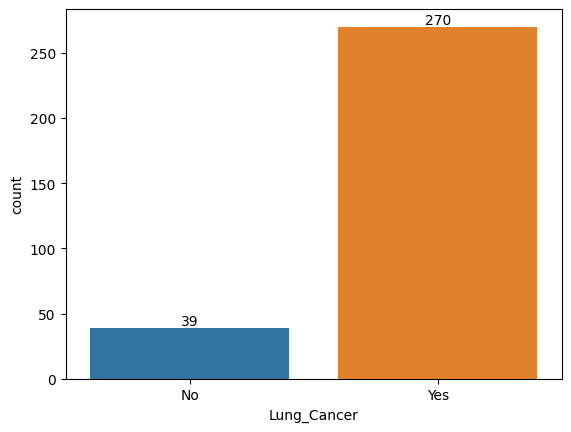

In [11]:
ax = sns.countplot(x='Lung_Cancer', data=df)
plt.gca().set_xticklabels(labels=["No","Yes"])
for container in ax.containers:
    ax.bar_label(container)

In [12]:
print(df.Lung_Cancer.value_counts())
print()
print(round(df.Lung_Cancer.value_counts(normalize=True),2)*100)

1    270
0     39
Name: Lung_Cancer, dtype: int64

1    87.0
0    13.0
Name: Lung_Cancer, dtype: float64


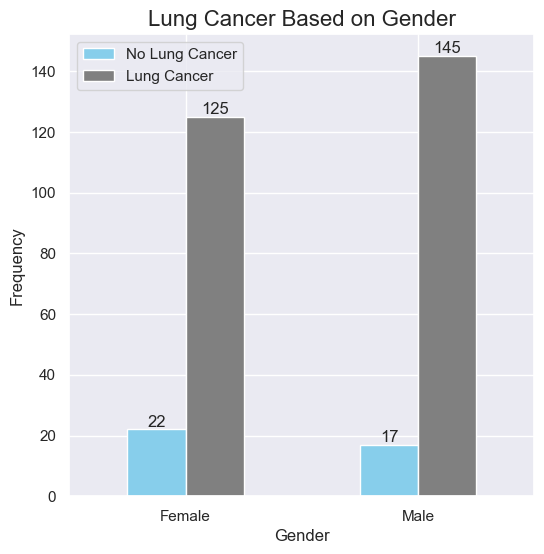

In [13]:
sns.set(style="darkgrid")
ax1 = pd.crosstab(df.Gender,df.Lung_Cancer)
bar1=ax1.plot(kind="bar",figsize=(6,6),color=['skyblue',"grey"])
plt.title('Lung Cancer Based on Gender', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.gca().set_xticklabels(labels=["Female","Male"])
plt.xticks(rotation=0)
plt.legend(["No Lung Cancer", "Lung Cancer"])
for c in bar1.containers:
    # set the bar label
    bar1.bar_label(c, label_type='edge')
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Lung_Cancer'>

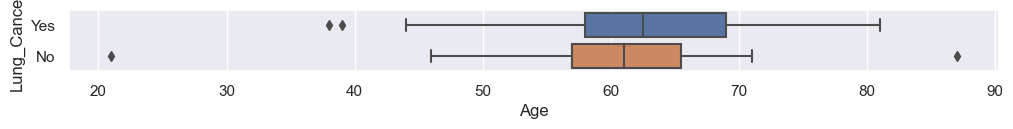

In [14]:
# sns.set(style="darkgrid")
# pd.crosstab(df.Age, df.Lung_Cancer).plot(kind="bar", figsize=(20, 6), ax=plt.gca())
# plt.title("Lung Cancer vs Age",fontsize=20)
# plt.legend(["No Lung Cancer", "Lung Cancer"])
# plt.xlabel("Age",fontsize=15)
# plt.ylabel("Frequency",fontsize=15)
# plt.show()

df2=df[['Age','Lung_Cancer']]
df2['Lung_Cancer'] = df2['Lung_Cancer'].map(
                   {1:'Yes' ,0:'No'})
plt.figure(figsize=(12,0.8))
sns.boxplot(data=df2, x='Age',y='Lung_Cancer')

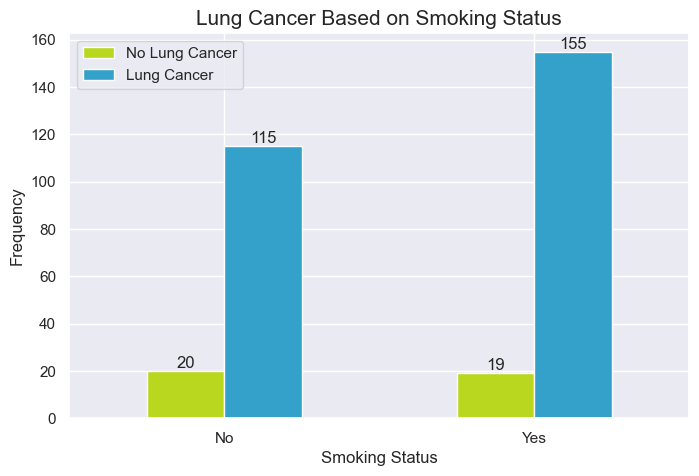

In [15]:
sns.set(style="darkgrid")
ax2 = pd.crosstab(df.Smoking, df.Lung_Cancer)
bar2 = ax2.plot(kind="bar", figsize=(8,5), color=['#BAD720',"#33A1C9"], ax=plt.gca())
plt.legend(["No Lung Cancer", "Lung Cancer"])
plt.title("Lung Cancer Based on Smoking Status",fontsize=15)
plt.xlabel("Smoking Status",fontsize=12)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["No","Yes"])
plt.ylabel("Frequency",fontsize=12)
for c in bar2.containers:
    # set the bar label
    bar2.bar_label(c, label_type='edge')
plt.show()

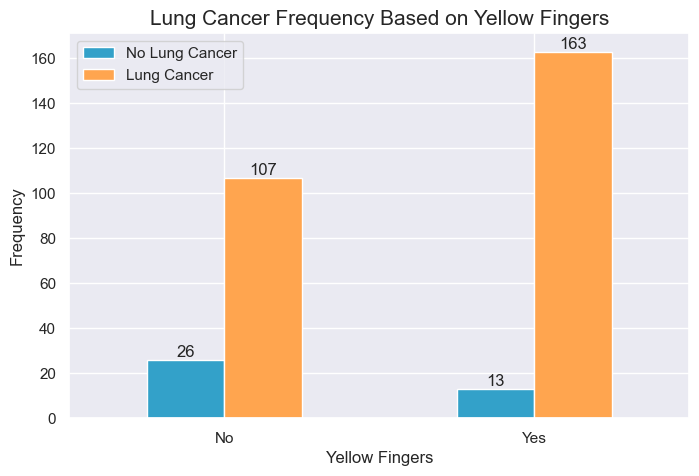

In [16]:
sns.set(style="darkgrid")
ax3 = pd.crosstab(df.Yellow_Fingers, df.Lung_Cancer)
bar3 = ax3.plot(kind="bar", figsize=(8,5), color=["#33A1C9", "#FFA54F"], ax=plt.gca())
plt.legend(["No Lung Cancer", "Lung Cancer"])
plt.title("Lung Cancer Frequency Based on Yellow Fingers",fontsize=15)
plt.xlabel("Yellow Fingers",fontsize=12)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["No","Yes"])
plt.ylabel("Frequency",fontsize=12)
for c in bar3.containers:
    # set the bar label
    bar3.bar_label(c, label_type='edge')
plt.show()

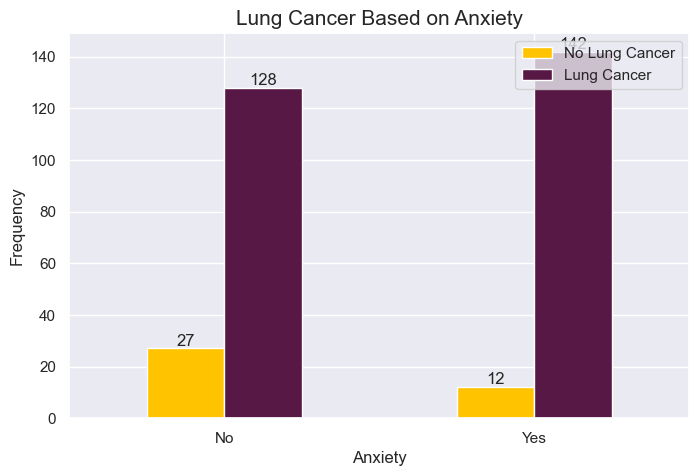

In [17]:
sns.set(style="darkgrid")
ax4 = pd.crosstab(df.Anxiety, df.Lung_Cancer)
bar4 = ax4.plot(kind="bar", figsize=(8,5), color=["#FFC300", "#581845"], ax=plt.gca())
plt.legend(["No Lung Cancer", "Lung Cancer"])
plt.title("Lung Cancer Based on Anxiety",fontsize=15)
plt.xlabel("Anxiety",fontsize=12)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["No","Yes"])
plt.ylabel("Frequency",fontsize=12)
for c in bar4.containers:
    # set the bar label
    bar4.bar_label(c, label_type='edge')
plt.show()

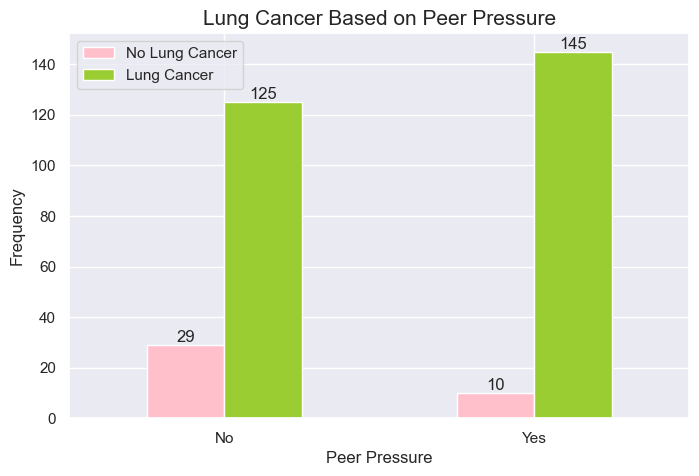

In [18]:
sns.set(style="darkgrid")
ax5 = pd.crosstab(df.Peer_Pressure, df.Lung_Cancer)
bar5 = ax5.plot(kind="bar", figsize=(8,5), color=['pink','yellowgreen'], ax=plt.gca())
plt.legend(["No Lung Cancer", "Lung Cancer"])
plt.title("Lung Cancer Based on Peer Pressure",fontsize=15)
plt.xlabel("Peer Pressure",fontsize=12)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["No","Yes"])
plt.ylabel("Frequency",fontsize=12)
for c in bar5.containers:
    # set the bar label
    bar5.bar_label(c, label_type='edge')
plt.show()

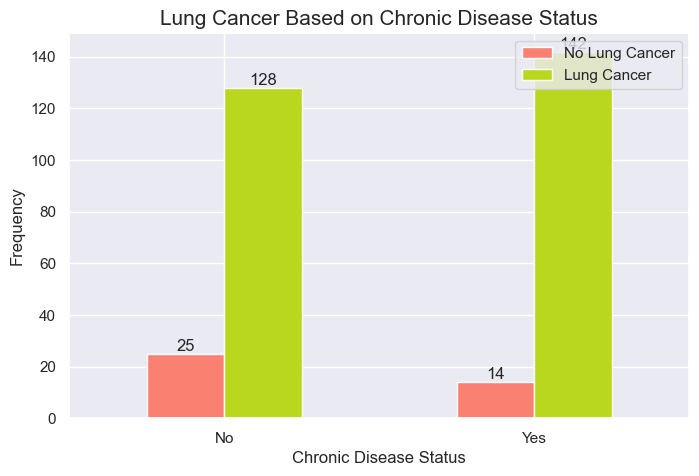

In [19]:
sns.set(style="darkgrid")
ax6 = pd.crosstab(df.Chronic_Disease, df.Lung_Cancer)
bar6 = ax6.plot(kind="bar", figsize=(8,5), color=['salmon',"#BAD720"], ax=plt.gca())
plt.legend(["No Lung Cancer", "Lung Cancer"])
plt.title("Lung Cancer Based on Chronic Disease Status",fontsize=15)
plt.xlabel("Chronic Disease Status",fontsize=12)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["No","Yes"])
plt.ylabel("Frequency",fontsize=12)
for c in bar6.containers:
    # set the bar label
    bar6.bar_label(c, label_type='edge')
plt.show()

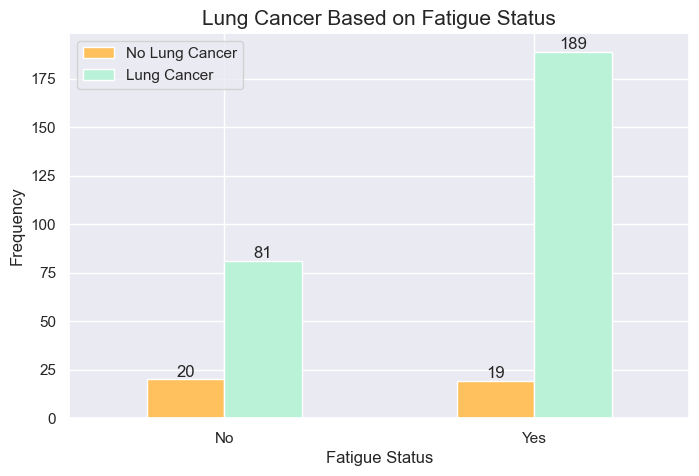

In [20]:
sns.set(style="darkgrid")
ax7 = pd.crosstab(df.Fatigue, df.Lung_Cancer)
bar7 = ax7.plot(kind="bar", figsize=(8,5), color=['#FFC15E',"#BAF2D8"], ax=plt.gca())
plt.legend(["No Lung Cancer", "Lung Cancer"])
plt.title("Lung Cancer Based on Fatigue Status",fontsize=15)
plt.xlabel("Fatigue Status",fontsize=12)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["No","Yes"])
plt.ylabel("Frequency",fontsize=12)
for c in bar7.containers:
    # set the bar label
    bar7.bar_label(c, label_type='edge')
plt.show()

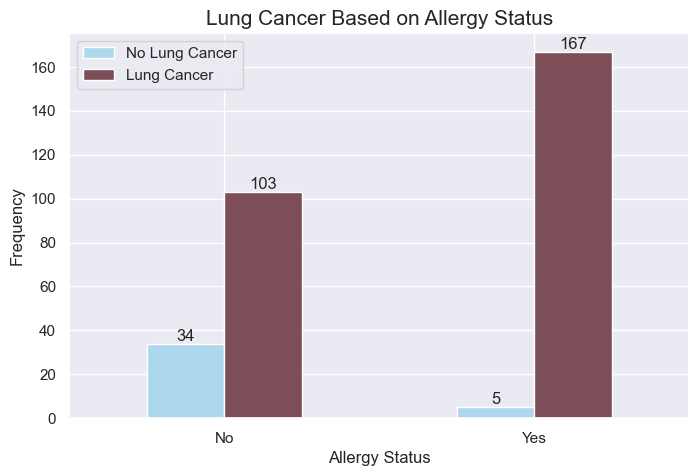

In [21]:
sns.set(style="darkgrid")
ax8 = pd.crosstab(df.Allergy, df.Lung_Cancer)
bar8 = ax8.plot(kind="bar", figsize=(8,5), color=['#ACD7EC',"#7D4E57"], ax=plt.gca())
plt.legend(["No Lung Cancer", "Lung Cancer"])
plt.title("Lung Cancer Based on Allergy Status",fontsize=15)
plt.xlabel("Allergy Status",fontsize=12)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["No","Yes"])
plt.ylabel("Frequency",fontsize=12)
for c in bar8.containers:
    # set the bar label
    bar8.bar_label(c, label_type='edge')
plt.show()

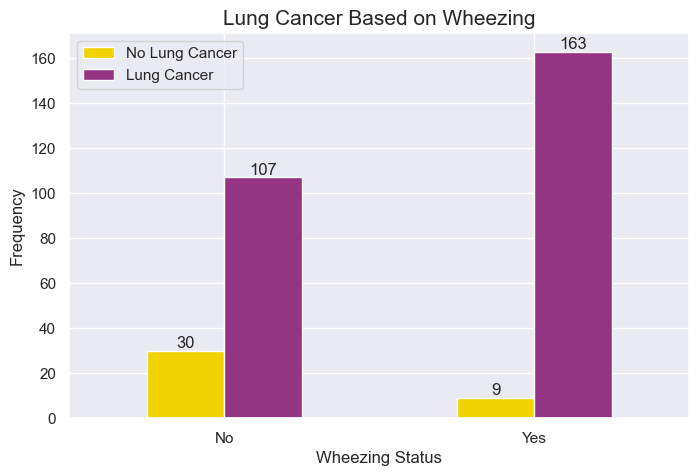

In [22]:
sns.set(style="darkgrid")
ax9 = pd.crosstab(df.Wheezing, df.Lung_Cancer)
bar9 = ax9.plot(kind="bar", figsize=(8,5), color=['#F1D302',"#963484"], ax=plt.gca())
plt.legend(["No Lung Cancer", "Lung Cancer"])
plt.title("Lung Cancer Based on Wheezing",fontsize=15)
plt.xlabel("Wheezing Status",fontsize=12)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["No","Yes"])
plt.ylabel("Frequency",fontsize=12)
for c in bar9.containers:
    # set the bar label
    bar9.bar_label(c, label_type='edge')
plt.show()

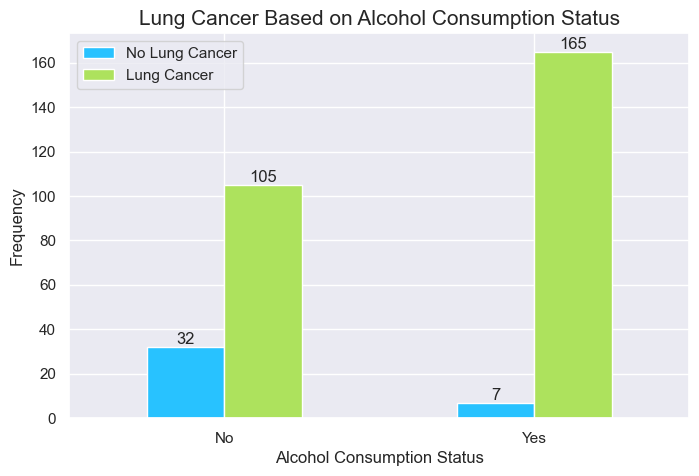

In [23]:
sns.set(style="darkgrid")
ax10 = pd.crosstab(df.Alcohol_Consumption, df.Lung_Cancer)
bar10 = ax10.plot(kind="bar", figsize=(8,5), color=['#28C2FF',"#ADE25D"], ax=plt.gca())
plt.legend(["No Lung Cancer", "Lung Cancer"])
plt.title("Lung Cancer Based on Alcohol Consumption Status",fontsize=15)
plt.xlabel("Alcohol Consumption Status",fontsize=12)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["No","Yes"])
plt.ylabel("Frequency",fontsize=12)
for c in bar10.containers:
    # set the bar label
    bar10.bar_label(c, label_type='edge')
plt.show()

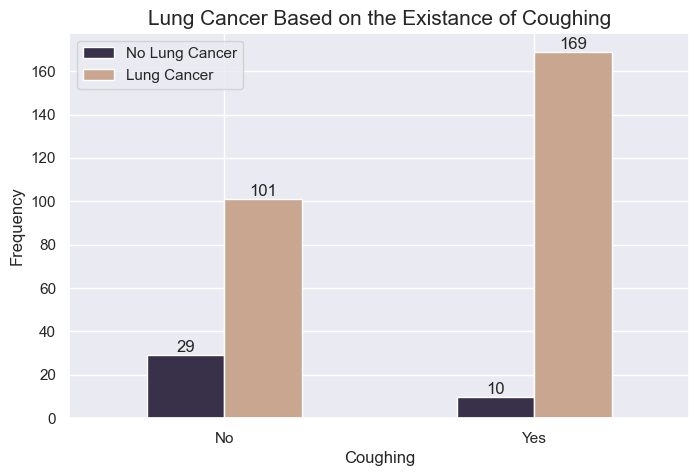

In [24]:
sns.set(style="darkgrid")
ax11 = pd.crosstab(df.Coughing, df.Lung_Cancer)
bar11 = ax11.plot(kind="bar", figsize=(8,5), color=['#39304A',"#C9A690"], ax=plt.gca())
plt.legend(["No Lung Cancer", "Lung Cancer"])
plt.title("Lung Cancer Based on the Existance of Coughing",fontsize=15)
plt.xlabel("Coughing",fontsize=12)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["No","Yes"])
plt.ylabel("Frequency",fontsize=12)
for c in bar11.containers:
    # set the bar label
    bar11.bar_label(c, label_type='edge')
plt.show()

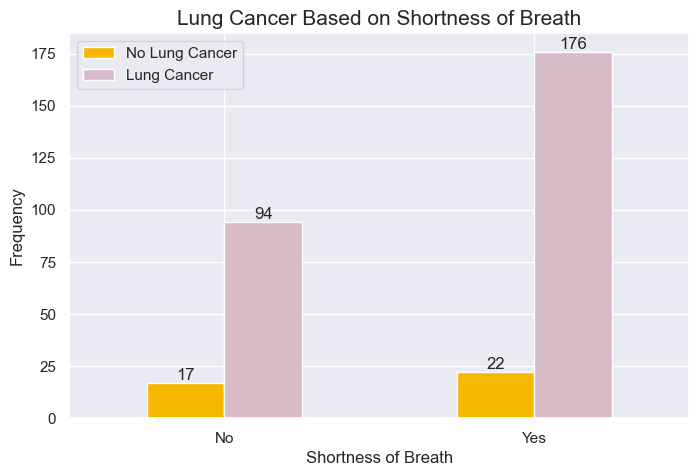

In [25]:
sns.set(style="darkgrid")
ax12 = pd.crosstab(df.Shortness_Of_Breath, df.Lung_Cancer)
bar12 = ax12.plot(kind="bar", figsize=(8,5), color=['#F7B801',"#D7BCC8"], ax=plt.gca())
plt.legend(["No Lung Cancer", "Lung Cancer"])
plt.title("Lung Cancer Based on Shortness of Breath",fontsize=15)
plt.xlabel("Shortness of Breath",fontsize=12)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["No","Yes"])
plt.ylabel("Frequency",fontsize=12)
for c in bar12.containers:
    # set the bar label
    bar12.bar_label(c, label_type='edge')
plt.show()

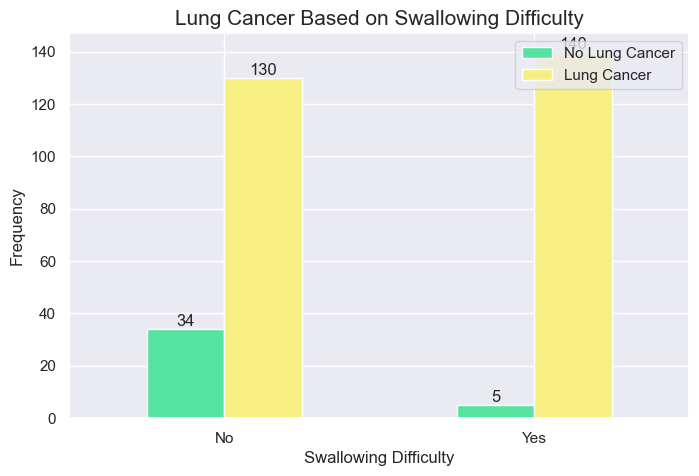

In [26]:
sns.set(style="darkgrid")
ax13 = pd.crosstab(df.Swallowing_Difficulty, df.Lung_Cancer)
bar13 = ax13.plot(kind="bar", figsize=(8,5), color=['#56E39F',"#F7EF81"], ax=plt.gca())
plt.legend(["No Lung Cancer", "Lung Cancer"])
plt.title("Lung Cancer Based on Swallowing Difficulty",fontsize=15)
plt.xlabel("Swallowing Difficulty",fontsize=12)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["No","Yes"])
plt.ylabel("Frequency",fontsize=12)
for c in bar13.containers:
    # set the bar label
    bar13.bar_label(c, label_type='edge')
plt.show()

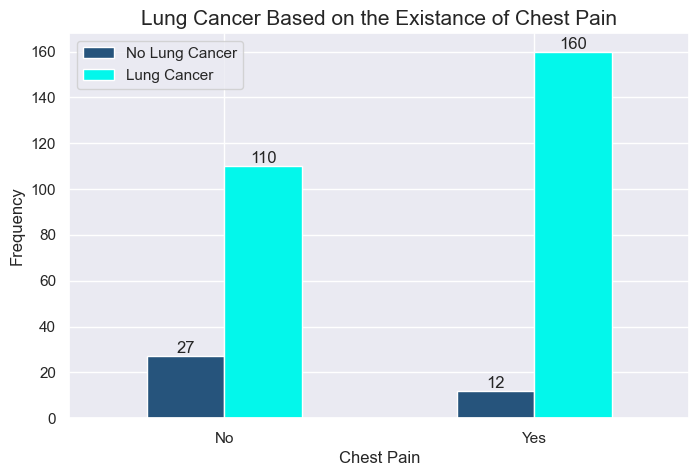

In [27]:
sns.set(style="darkgrid")
ax14 = pd.crosstab(df.Chest_Pain, df.Lung_Cancer)
bar14 = ax14.plot(kind="bar", figsize=(8,5), color=['#26547C',"#03F7EB"], ax=plt.gca())
plt.legend(["No Lung Cancer", "Lung Cancer"])
plt.title("Lung Cancer Based on the Existance of Chest Pain",fontsize=15)
plt.xlabel("Chest Pain",fontsize=12)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["No","Yes"])
plt.ylabel("Frequency",fontsize=12)
for c in bar14.containers:
    # set the bar label
    bar14.bar_label(c, label_type='edge')
plt.show()

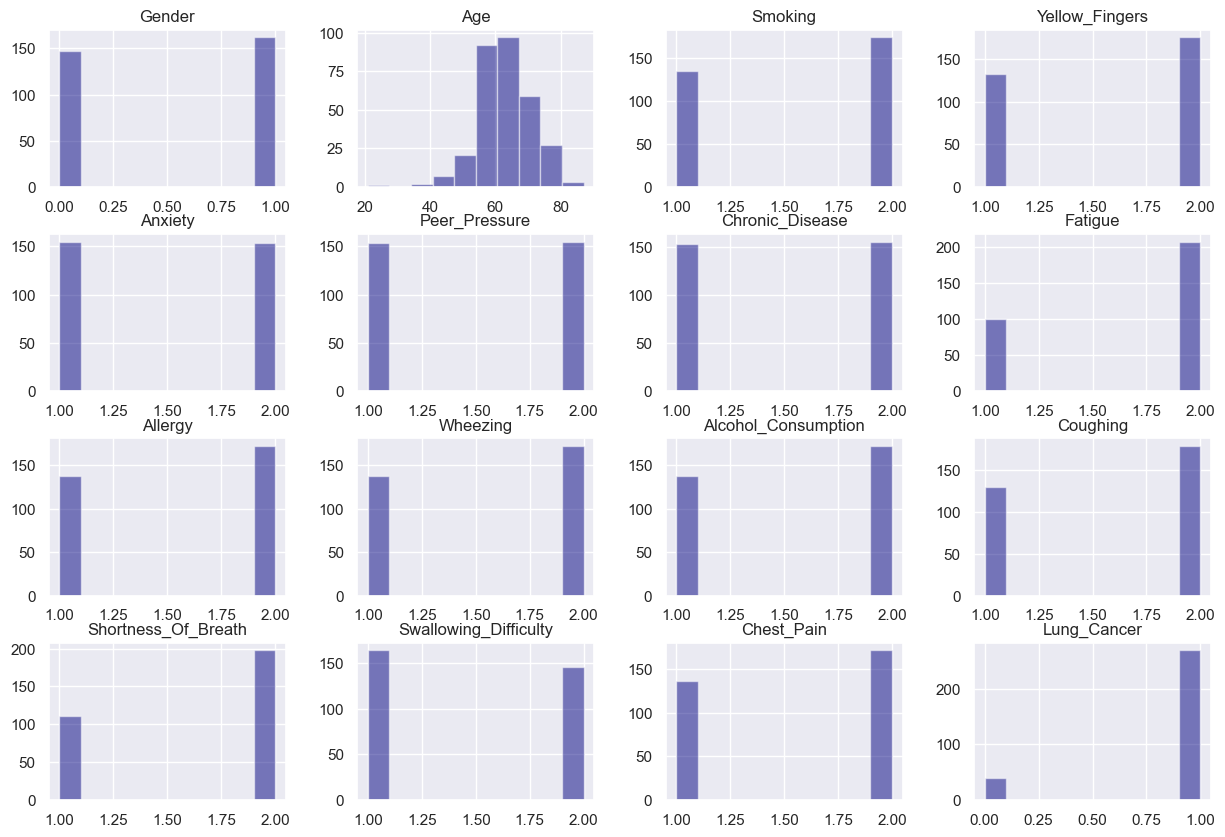

In [28]:
sns.set(style="darkgrid")
df.hist(bins=10,figsize=(15,10) ,color = 'navy', alpha = 0.5)
plt.show()

### Development of Machine Learning Models

#### SMOTE

In [29]:
from imblearn.over_sampling import SMOTE
x, y = df.iloc[:, 0:-1], df.iloc[:, -1:]

print("Before Oversampling, the counts of label 1: ", y.value_counts()[1])
print("Before Oversampling, the counts of label 0: ", y.value_counts()[0])

oversample = SMOTE()
x_train_res, y_train_res = oversample.fit_resample(x, y)

print("After Oversampling, the counts of label 1: ", y_train_res.value_counts()[1])
print("After Oversampling, the counts of label 0: ", y_train_res.value_counts()[0])

Before Oversampling, the counts of label 1:  270
Before Oversampling, the counts of label 0:  39
After Oversampling, the counts of label 1:  270
After Oversampling, the counts of label 0:  270


#### Split Dataset 

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_train_res, y_train_res, test_size=0.1, random_state=42)

#### Machine Learning 1: Random Forest 

In [44]:
# Training of Random Forest
RF = RandomForestClassifier(n_jobs=-1, random_state=42)
RF_t0 = time.time()
RF.fit(x_train,y_train)
RF_t1 = time.time()
prediction_linear_RF = RF.predict(x_test)
RF_t2 = time.time()
RF_time_linear_train = RF_t1-RF_t0
RF_time_linear_predict = RF_t2-RF_t1

In [45]:
# Results of Random Forest
print(f'Random Forest Accuracy: {round(RF.score(x_test, y_test)*100,2)}%')
report_RF = classification_report(y_test, prediction_linear_RF, output_dict=True)
print('Lung Cancer: ', report_RF['1'])
print('No Lung Cancer: ', report_RF['0'])

Random Forest Accuracy: 92.59%
Lung Cancer:  {'precision': 0.8888888888888888, 'recall': 0.96, 'f1-score': 0.923076923076923, 'support': 25}
No Lung Cancer:  {'precision': 0.9629629629629629, 'recall': 0.896551724137931, 'f1-score': 0.9285714285714286, 'support': 29}


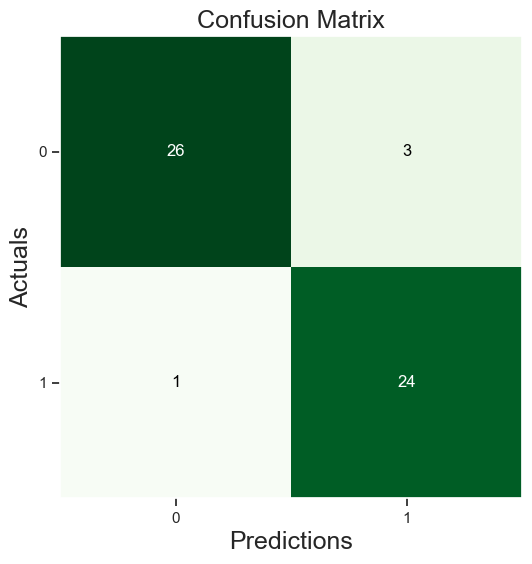

In [46]:
# Performance of Random Forest in Confusion Matrix
conf_matrix_RF = confusion_matrix(y_test, prediction_linear_RF)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_RF, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Machine Learning 2: Decision Tree  

In [47]:
# Training of Decision Tree
DT = DecisionTreeClassifier()
DT_t0 = time.time()
DT.fit(x_train,y_train)
DT_t1 = time.time()
prediction_linear_DT = DT.predict(x_test)
DT_t2 = time.time()
DT_time_linear_train = DT_t1-DT_t0
DT_time_linear_predict = DT_t2-DT_t1

In [48]:
# Results of Decision Tree
print(f'Decision Tree Accuracy: {round(DT.score(x_test, y_test)*100,2)}%')
report_DT = classification_report(y_test, prediction_linear_DT, output_dict=True)
print('Lung Cancer: ', report_DT['1'])
print('No Lung Cancer: ', report_DT['0'])

Decision Tree Accuracy: 92.59%
Lung Cancer:  {'precision': 0.8888888888888888, 'recall': 0.96, 'f1-score': 0.923076923076923, 'support': 25}
No Lung Cancer:  {'precision': 0.9629629629629629, 'recall': 0.896551724137931, 'f1-score': 0.9285714285714286, 'support': 29}


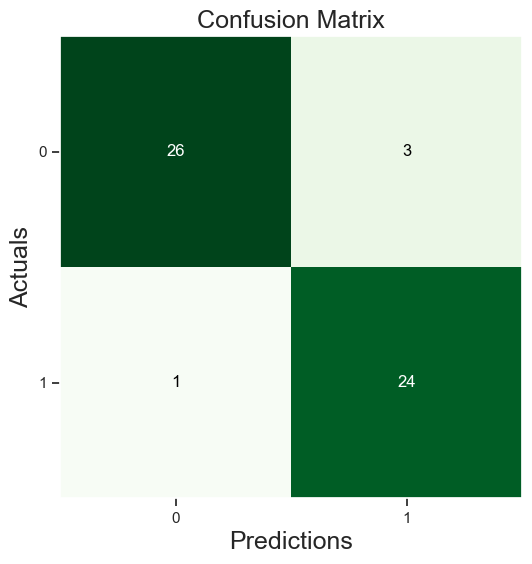

In [49]:
# Performance of Decision Tree in Confusion Matrix
conf_matrix_DT = confusion_matrix(y_test, prediction_linear_DT)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_DT, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Machine Learning 3: Support Vector Machine

In [50]:
#Training of Support Vector Machine
SVM = svm.SVC(kernel='linear', random_state=0)
SVM_t0 = time.time()
SVM.fit(x_train,y_train)
SVM_t1 = time.time()
prediction_linear_SVM = SVM.predict(x_test)
SVM_t2 = time.time()
SVM_time_linear_train = SVM_t1-SVM_t0
SVM_time_linear_predict = SVM_t2-SVM_t1

In [51]:
# Results of Support Vector Machine
print(f'Support Vector Machine Accuracy: {round(SVM.score(x_test, y_test)*100,2)}%')
report_SVM = classification_report(y_test, prediction_linear_SVM, output_dict=True)
print('Lung Cancer: ', report_SVM['1'])
print('No Lung Cancer: ', report_SVM['0'])

Support Vector Machine Accuracy: 94.44%
Lung Cancer:  {'precision': 0.9230769230769231, 'recall': 0.96, 'f1-score': 0.9411764705882353, 'support': 25}
No Lung Cancer:  {'precision': 0.9642857142857143, 'recall': 0.9310344827586207, 'f1-score': 0.9473684210526316, 'support': 29}


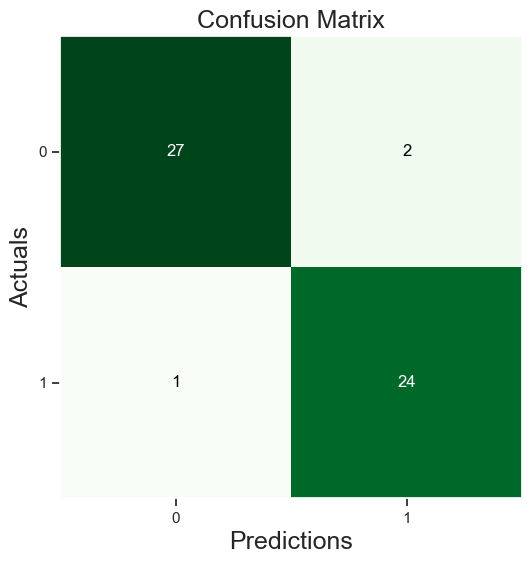

In [52]:
# Performance of Support Vector Machine in Confusion Matrix
conf_matrix_SVM = confusion_matrix(y_test, prediction_linear_SVM)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_SVM, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Machine Learning 4: Naive Bayes# 

In [53]:
# Training of Naive Bayes
NB = GaussianNB()
NB_t0 = time.time()
NB.fit(x_train, y_train)
NB_t1 = time.time()
prediction_linear_NB = NB.predict(x_test)
NB_t2 = time.time()
NB_time_linear_train = NB_t1-NB_t0
NB_time_linear_predict = NB_t2-NB_t1

In [54]:
# Results of Naive Bayes
print(f'Naive Bayes Accuracy: {round(NB.score(x_test, y_test)*100,2)}%')
report_NB = classification_report(y_test, prediction_linear_NB, output_dict=True)
print('Lung Cancer: ', report_NB['1'])
print('No Lung Cancer: ', report_NB['0'])

Naive Bayes Accuracy: 92.59%
Lung Cancer:  {'precision': 0.8888888888888888, 'recall': 0.96, 'f1-score': 0.923076923076923, 'support': 25}
No Lung Cancer:  {'precision': 0.9629629629629629, 'recall': 0.896551724137931, 'f1-score': 0.9285714285714286, 'support': 29}


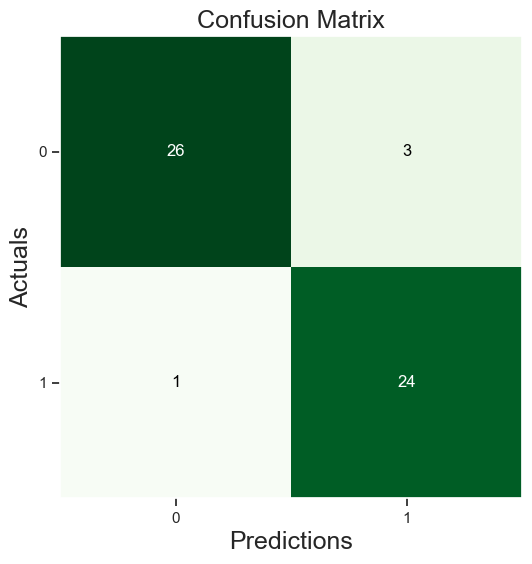

In [55]:
# Performance of Naive Bayes in Confusion Matrix
conf_matrix_NB = confusion_matrix(y_test, prediction_linear_NB)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_NB, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Summary of all machine learning models 

In [56]:
print('---------------------------------------------------------------------------------------------------------------------')
print('Summary of all machine learning models (Lung Cancer)')
print('---------------------------------------------------------------------------------------------------------------------')
print("Training time: %fs; Prediction time: %fs" % (RF_time_linear_train, RF_time_linear_predict))
print(f'Random Forest Accuracy: {round(RF.score(x_test, y_test)*100,2)}%')
print('Lung Cancer: ', report_RF['1'])
print('No Lung Cancer: ', report_RF['0'])
print('---------------------------------------------------------------------------------------------------------------------')
print("Training time: %fs; Prediction time: %fs" % (DT_time_linear_train, DT_time_linear_predict))
print(f'Decision Tree Accuracy: {round(DT.score(x_test, y_test)*100,2)}%')
print('Lung Cancer: ', report_DT['1'])
print('No Lung Cancer: ', report_DT['0'])
print('---------------------------------------------------------------------------------------------------------------------')
print("Training time: %fs; Prediction time: %fs" % (SVM_time_linear_train, SVM_time_linear_predict))
print(f'Support Vector Machine Accuracy: {round(SVM.score(x_test, y_test)*100,2)}%')
print('Lung Cancer: ', report_SVM['1'])
print('No Lung Cancer: ', report_SVM['0'])
print('---------------------------------------------------------------------------------------------------------------------')
print("Training time: %fs; Prediction time: %fs" % (NB_time_linear_train, NB_time_linear_predict))
print(f'Naive Bayes Accuracy: {round(NB.score(x_test, y_test)*100,2)}%')
print('Lung Cancer: ', report_NB['1'])
print('No Lung Cancer: ', report_NB['0'])
print('---------------------------------------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------------------------------------
Summary of all machine learning models (Lung Cancer)
---------------------------------------------------------------------------------------------------------------------
Training time: 0.308672s; Prediction time: 0.037287s
Random Forest Accuracy: 92.59%
Lung Cancer:  {'precision': 0.8888888888888888, 'recall': 0.96, 'f1-score': 0.923076923076923, 'support': 25}
No Lung Cancer:  {'precision': 0.9629629629629629, 'recall': 0.896551724137931, 'f1-score': 0.9285714285714286, 'support': 29}
---------------------------------------------------------------------------------------------------------------------
Training time: 0.006941s; Prediction time: 0.003684s
Decision Tree Accuracy: 92.59%
Lung Cancer:  {'precision': 0.8888888888888888, 'recall': 0.96, 'f1-score': 0.923076923076923, 'support': 25}
No Lung Cancer:  {'precision': 0.9629629629629629, 'recall': 0.896551724137931

### Export the best machine learning into a file 

In [202]:
import pickle
# Saving model to current directory
# Pickle serializes objects so they can be saved to a file, and loaded in a program again later on.
pickle.dump(SVM, open('Support_Vector_Machine_Lung_Cancer_1.pkl','wb'))